In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2020.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.00
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.00
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.00
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.00
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2725232,SPB-12680,2020-06-30 13:01:33,1346,길음8골어린이공원 옆,1,2020-07-01 02:50:27,1347,길음래미안아파트817동 상가 앞,1,15,7230.00
2725233,SPB-40800,2020-06-30 23:56:30,107,신한은행 서교동금융센터점 앞,0,2020-07-01 07:41:32,438,성산2-1 공영주차장,0,465,0.00
2725234,SPB-32402,2020-06-30 16:45:32,1956,도야미리숯불갈비 앞,0,2020-07-01 08:04:52,1956,도야미리숯불갈비 앞,0,919,39786.76
2725235,SPB-38526,2020-06-30 23:23:38,703,오목교역 7번출구 앞,0,2020-07-01 08:37:15,734,신트리공원 입구,0,554,0.00


In [3]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725237 entries, 0 to 2725236
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 228.7+ MB


In [5]:
df.describe()

,대여대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06
mean,1.295493e+03,2.009205e+00,1.294180e+03,1.994612e+00,3.114785e+01,1.165833e+03
std,8.867727e+02,4.307910e+00,8.794585e+02,4.281654e+00,3.233065e+01,3.819571e+03
min,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.580000e+02,0.000000e+00,5.650000e+02,0.000000e+00,9.000000e+00,0.000000e+00
50%,1.175000e+03,0.000000e+00,1.173000e+03,0.000000e+00,1.900000e+01,0.000000e+00
75%,1.936000e+03,1.000000e+00,1.925000e+03,1.000000e+00,4.300000e+01,0.000000e+00
max,9.999900e+04,4.000000e+01,9.999900e+04,4.000000e+01,2.614000e+03,2.105400e+05


In [6]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2020-06-01 00:00:35,현대6차 아파트,2020-06-01 00:05:24,양지근린공원앞
1,2020-06-01 00:01:47,신용산역 6번출구 앞,2020-06-01 00:05:54,베르가모앞
2,2020-06-01 00:03:05,둔촌역 3번 출입구,2020-06-01 00:05:59,둔촌사거리
3,2020-06-01 00:04:31,잠실나루역 (2번 출구 쪽),2020-06-01 00:06:10,잠실나루역 (2번 출구 쪽)
4,2020-06-01 00:00:46,등촌역 7번출구,2020-06-01 00:06:53,염창역 1번 출구
...,...,...,...,...
2725232,2020-06-30 13:01:33,길음8골어린이공원 옆,2020-07-01 02:50:27,길음래미안아파트817동 상가 앞
2725233,2020-06-30 23:56:30,신한은행 서교동금융센터점 앞,2020-07-01 07:41:32,성산2-1 공영주차장
2725234,2020-06-30 16:45:32,도야미리숯불갈비 앞,2020-07-01 08:04:52,도야미리숯불갈비 앞
2725235,2020-06-30 23:23:38,오목교역 7번출구 앞,2020-07-01 08:37:15,신트리공원 입구


In [7]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [8]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [9]:
df = df.sort_values('대여일시', ignore_index = True)
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,0,6,1,0,0,41
1,2020-06-01 00:00:16,응암시장교차로,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,0,6,1,0,0,8
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,0,6,1,0,0,14
3,2020-06-01 00:00:26,능골근린공원,2020-06-01 00:07:13,능골근린공원,6,1,0,0,0,6,1,0,0,7
4,2020-06-01 00:00:32,응봉역 1번출구,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,0,6,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725232,2020-06-30 23:59:43,하계동 중평어린이공원 앞,2020-07-01 00:09:19,당현천근린공원,6,30,1,23,59,7,1,2,0,9
2725233,2020-06-30 23:59:43,서교동 사거리,2020-07-01 00:31:51,신사동 성당,6,30,1,23,59,7,1,2,0,31
2725234,2020-06-30 23:59:46,교대역 5번출구뒤,2020-07-01 00:06:20,서초신동아1차아파트 옆,6,30,1,23,59,7,1,2,0,6
2725235,2020-06-30 23:59:48,"번동 주공3, 4단지 교차로",2020-07-01 00:04:31,예수그리스도후기성도교회 앞,6,30,1,23,59,7,1,2,0,4


- 대여일시 기준으로 6월인 것부터 분석할 것이므로 대여월이 5인 것은 삭제

In [10]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,0,6,1,0,0,41
1,2020-06-01 00:00:16,응암시장교차로,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,0,6,1,0,0,8
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,0,6,1,0,0,14
3,2020-06-01 00:00:26,능골근린공원,2020-06-01 00:07:13,능골근린공원,6,1,0,0,0,6,1,0,0,7
4,2020-06-01 00:00:32,응봉역 1번출구,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,0,6,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725083,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,55,6,30,1,23,59
2725088,2020-06-30 23:55:17,가좌삼거리,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,55,6,30,1,23,59
2725106,2020-06-30 23:56:01,신사역 4번출구 뒤,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,56,6,30,1,23,59
2725126,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,56,6,30,1,23,58


In [11]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [12]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,6,1,0,0,0
1,2020-06-01 00:00:16,응암시장교차로,6,1,0,0,0
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,6,1,0,0,0
3,2020-06-01 00:00:26,능골근린공원,6,1,0,0,0
4,2020-06-01 00:00:32,응봉역 1번출구,6,1,0,0,0
...,...,...,...,...,...,...,...
2724714,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),6,30,1,23,55
2724715,2020-06-30 23:55:17,가좌삼거리,6,30,1,23,55
2724716,2020-06-30 23:56:01,신사역 4번출구 뒤,6,30,1,23,56
2724717,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,6,30,1,23,56


In [13]:
df_rental = df_rental[df_rental['대여대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:10:06,롯데월드타워(잠실역2번출구 쪽),6,1,0,0,10
1,2020-06-01 07:17:57,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,17
2,2020-06-01 07:29:14,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,29
3,2020-06-01 07:30:48,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,30
4,2020-06-01 08:02:26,롯데월드타워(잠실역2번출구 쪽),6,1,0,8,2
...,...,...,...,...,...,...,...
7236,2020-06-30 20:52:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,52
7237,2020-06-30 20:54:48,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,54
7238,2020-06-30 22:43:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,43
7239,2020-06-30 22:46:41,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,46


In [14]:
df_rental['unit_time'] = df_rental['대여시간_분'].apply(lambda x: x//10)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,unit_time
0,2020-06-01 00:10:06,롯데월드타워(잠실역2번출구 쪽),6,1,0,0,10,1
1,2020-06-01 07:17:57,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,17,1
2,2020-06-01 07:29:14,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,29,2
3,2020-06-01 07:30:48,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,30,3
4,2020-06-01 08:02:26,롯데월드타워(잠실역2번출구 쪽),6,1,0,8,2,0
...,...,...,...,...,...,...,...,...
7236,2020-06-30 20:52:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,52,5
7237,2020-06-30 20:54:48,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,54,5
7238,2020-06-30 22:43:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,43,4
7239,2020-06-30 22:46:41,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,46,4


In [15]:
df_rental['30time'] = -1

In [16]:
for i in range(len(df_rental)):
    
    if df_rental['unit_time'][i] == 0 or df_rental['unit_time'][i] == 1 or df_rental['unit_time'][i] == 2:
        df_rental['30time'][i] = 0
    else:
        df_rental['30time'][i] = 30    
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,unit_time,30time
0,2020-06-01 00:10:06,롯데월드타워(잠실역2번출구 쪽),6,1,0,0,10,1,0
1,2020-06-01 07:17:57,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,17,1,0
2,2020-06-01 07:29:14,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,29,2,0
3,2020-06-01 07:30:48,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,30,3,30
4,2020-06-01 08:02:26,롯데월드타워(잠실역2번출구 쪽),6,1,0,8,2,0,0
...,...,...,...,...,...,...,...,...,...
7236,2020-06-30 20:52:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,52,5,30
7237,2020-06-30 20:54:48,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,54,5,30
7238,2020-06-30 22:43:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,43,4,30
7239,2020-06-30 22:46:41,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,46,4,30


In [17]:
df_rental = pd.DataFrame(df_rental.groupby(['대여일', '대여시간', '30time']).size()).sort_index()
df_rental

0
대여일 대여시간 30time    
1   0    0        1
    7    0        2
         30       1
    8    0        6
         30      15
...              ..
30  19   0       12
         30       4
    20   0        5
         30       3
    22   30       3

[1076 rows x 1 columns]

In [18]:
df_rental.reset_index(inplace = True)
df_rental

,대여일,대여시간,30time,0
0,1,0,0,1
1,1,7,0,2
2,1,7,30,1
3,1,8,0,6
4,1,8,30,15
...,...,...,...,...
1071,30,19,0,12
1072,30,19,30,4
1073,30,20,0,5
1074,30,20,30,3


In [19]:
df_rental = df_rental.rename(columns = {0 : 'count'})
df_rental

,대여일,대여시간,30time,count
0,1,0,0,1
1,1,7,0,2
2,1,7,30,1
3,1,8,0,6
4,1,8,30,15
...,...,...,...,...
1071,30,19,0,12
1072,30,19,30,4
1073,30,20,0,5
1074,30,20,30,3


30time칼럼에서 0은 0분-30분, 30은 30분-00분

In [20]:
df_rental['mu_10'] = df_rental['count'] / 3
df_rental

,대여일,대여시간,30time,count,mu_10
0,1,0,0,1,0.333333
1,1,7,0,2,0.666667
2,1,7,30,1,0.333333
3,1,8,0,6,2.000000
4,1,8,30,15,5.000000
...,...,...,...,...,...
1071,30,19,0,12,4.000000
1072,30,19,30,4,1.333333
1073,30,20,0,5,1.666667
1074,30,20,30,3,1.000000


In [21]:
df_rental.drop(['count'], axis = 1, inplace = True)

In [22]:
df_rental

,대여일,대여시간,30time,mu_10
0,1,0,0,0.333333
1,1,7,0,0.666667
2,1,7,30,0.333333
3,1,8,0,2.000000
4,1,8,30,5.000000
...,...,...,...,...
1071,30,19,0,4.000000
1072,30,19,30,1.333333
1073,30,20,0,1.666667
1074,30,20,30,1.000000


- 즉, 평균서비스율 뮤는 위와 같다
- 위 표를 보면 1일 0시 30분~59분의 뮤는 1
- 1일 2시 30분~59분의 뮤는 0.3333
- 30일 21시 0분~30분의 뮤는 3.666667
- 30일 21시 30분~59분의 뮤는 1.33333

### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [23]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,41
1,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,8
2,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,14
3,2020-06-01 00:07:13,능골근린공원,6,1,0,0,7
4,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,21
...,...,...,...,...,...,...,...
2725083,2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,59
2725088,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,59
2725106,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,59
2725126,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,58


In [24]:
df_return = df_return[df_return['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_return.reset_index(drop = True, inplace = True)
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 04:44:25,롯데월드타워(잠실역2번출구 쪽),6,1,0,4,44
1,2020-06-01 06:34:50,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,34
2,2020-06-01 06:40:39,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,40
3,2020-06-01 06:56:00,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,56
4,2020-06-01 06:59:42,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,59
...,...,...,...,...,...,...,...
7309,2020-06-30 21:06:39,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,6
7310,2020-06-30 21:10:37,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,10
7311,2020-06-30 22:18:58,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,18
7312,2020-06-30 22:51:59,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,51


In [25]:
df_return['unit_time'] = df_return['반납시간_분'].apply(lambda x: x//10)
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분,unit_time
0,2020-06-01 04:44:25,롯데월드타워(잠실역2번출구 쪽),6,1,0,4,44,4
1,2020-06-01 06:34:50,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,34,3
2,2020-06-01 06:40:39,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,40,4
3,2020-06-01 06:56:00,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,56,5
4,2020-06-01 06:59:42,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,59,5
...,...,...,...,...,...,...,...,...
7309,2020-06-30 21:06:39,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,6,0
7310,2020-06-30 21:10:37,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,10,1
7311,2020-06-30 22:18:58,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,18,1
7312,2020-06-30 22:51:59,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,51,5


In [26]:
df_return['30time'] = -1

In [27]:
for i in range(len(df_return)):
    
    if df_return['unit_time'][i] == 0 or df_return['unit_time'][i] == 1 or df_return['unit_time'][i] == 2:
        df_return['30time'][i] = 0
    else:
        df_return['30time'][i] = 30    
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분,unit_time,30time
0,2020-06-01 04:44:25,롯데월드타워(잠실역2번출구 쪽),6,1,0,4,44,4,30
1,2020-06-01 06:34:50,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,34,3,30
2,2020-06-01 06:40:39,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,40,4,30
3,2020-06-01 06:56:00,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,56,5,30
4,2020-06-01 06:59:42,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,59,5,30
...,...,...,...,...,...,...,...,...,...
7309,2020-06-30 21:06:39,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,6,0,0
7310,2020-06-30 21:10:37,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,10,1,0
7311,2020-06-30 22:18:58,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,18,1,0
7312,2020-06-30 22:51:59,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,51,5,30


In [28]:
df_return = pd.DataFrame(df_return.groupby(['반납일', '반납시간', '30time']).size()).sort_index()
df_return

0
반납일 반납시간 30time    
1   4    30       1
    6    30       4
    7    0        5
         30       5
    8    0       15
...              ..
30  20   0        3
         30       3
    21   0        4
    22   0        1
         30       2

[1094 rows x 1 columns]

In [29]:
df_return.reset_index(inplace = True)
df_return

,반납일,반납시간,30time,0
0,1,4,30,1
1,1,6,30,4
2,1,7,0,5
3,1,7,30,5
4,1,8,0,15
...,...,...,...,...
1089,30,20,0,3
1090,30,20,30,3
1091,30,21,0,4
1092,30,22,0,1


In [30]:
df_return = df_return.rename(columns = {0 : 'count'})
df_return

,반납일,반납시간,30time,count
0,1,4,30,1
1,1,6,30,4
2,1,7,0,5
3,1,7,30,5
4,1,8,0,15
...,...,...,...,...
1089,30,20,0,3
1090,30,20,30,3
1091,30,21,0,4
1092,30,22,0,1


30time칼럼에서 0은 0분-30분, 30은 30분-00분

In [31]:
df_return['lambda_10'] = df_return['count'] / 3
df_return

,반납일,반납시간,30time,count,lambda_10
0,1,4,30,1,0.333333
1,1,6,30,4,1.333333
2,1,7,0,5,1.666667
3,1,7,30,5,1.666667
4,1,8,0,15,5.000000
...,...,...,...,...,...
1089,30,20,0,3,1.000000
1090,30,20,30,3,1.000000
1091,30,21,0,4,1.333333
1092,30,22,0,1,0.333333


In [32]:
df_return.drop(['count'], axis = 1, inplace = True)
df_return

,반납일,반납시간,30time,lambda_10
0,1,4,30,0.333333
1,1,6,30,1.333333
2,1,7,0,1.666667
3,1,7,30,1.666667
4,1,8,0,5.000000
...,...,...,...,...
1089,30,20,0,1.000000
1090,30,20,30,1.000000
1091,30,21,0,1.333333
1092,30,22,0,0.333333


- 평균도착률 람다는 위 표와 같음
- 즉, 1일 0시 0분~30분의 람다는 0.333333
- 30일 22시 0분 ~ 30분의 람다는 1.333333
- 30일 22시 30분~59분의 람다는 0.666667

### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [33]:
df_rental = df_rental.rename(columns = {'대여일':'day', '대여시간':'hour', '30time':'minute'})
df_rental

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,7,0,0.666667
2,1,7,30,0.333333
3,1,8,0,2.000000
4,1,8,30,5.000000
...,...,...,...,...
1071,30,19,0,4.000000
1072,30,19,30,1.333333
1073,30,20,0,1.666667
1074,30,20,30,1.000000


In [34]:
df_return = df_return.rename(columns = {'반납일':'day', '반납시간':'hour', '30time':'minute'})
df_return

,day,hour,minute,lambda_10
0,1,4,30,0.333333
1,1,6,30,1.333333
2,1,7,0,1.666667
3,1,7,30,1.666667
4,1,8,0,5.000000
...,...,...,...,...
1089,30,20,0,1.000000
1090,30,20,30,1.000000
1091,30,21,0,1.333333
1092,30,22,0,0.333333


In [35]:
result = pd.merge(df_return, df_rental, how = 'left')
result

,day,hour,minute,lambda_10,mu_10
0,1,4,30,0.333333,NaN
1,1,6,30,1.333333,NaN
2,1,7,0,1.666667,0.666667
3,1,7,30,1.666667,0.333333
4,1,8,0,5.000000,2.000000
...,...,...,...,...,...
1089,30,20,0,1.000000,1.666667
1090,30,20,30,1.000000,1.000000
1091,30,21,0,1.333333,NaN
1092,30,22,0,0.333333,NaN


In [36]:
result['가용도'] = result['lambda_10'] / result['mu_10']
result

,day,hour,minute,lambda_10,mu_10,가용도
0,1,4,30,0.333333,NaN,NaN
1,1,6,30,1.333333,NaN,NaN
2,1,7,0,1.666667,0.666667,2.500000
3,1,7,30,1.666667,0.333333,5.000000
4,1,8,0,5.000000,2.000000,2.500000
...,...,...,...,...,...,...
1089,30,20,0,1.000000,1.666667,0.600000
1090,30,20,30,1.000000,1.000000,1.000000
1091,30,21,0,1.333333,NaN,NaN
1092,30,22,0,0.333333,NaN,NaN


### 초과수요율(excess demand rate)

In [37]:
df_rental

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,7,0,0.666667
2,1,7,30,0.333333
3,1,8,0,2.000000
4,1,8,30,5.000000
...,...,...,...,...
1071,30,19,0,4.000000
1072,30,19,30,1.333333
1073,30,20,0,1.666667
1074,30,20,30,1.000000


In [38]:
answer = df_rental
answer

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,7,0,0.666667
2,1,7,30,0.333333
3,1,8,0,2.000000
4,1,8,30,5.000000
...,...,...,...,...
1071,30,19,0,4.000000
1072,30,19,30,1.333333
1073,30,20,0,1.666667
1074,30,20,30,1.000000


In [39]:
answer = answer.set_index(['day', 'hour', 'minute'])
answer

mu_10
day hour minute          
1   0    0       0.333333
    7    0       0.666667
         30      0.333333
    8    0       2.000000
         30      5.000000
...                   ...
30  19   0       4.000000
         30      1.333333
    20   0       1.666667
         30      1.000000
    22   30      1.000000

[1076 rows x 1 columns]

In [40]:
mux = pd.MultiIndex.from_product([answer.index.levels[0], answer.index.levels[1], answer.index.levels[2]],names=['day','hour', 'minute'])
mux

MultiIndex([( 1,  0,  0),
            ( 1,  0, 30),
            ( 1,  1,  0),
            ( 1,  1, 30),
            ( 1,  2,  0),
            ( 1,  2, 30),
            ( 1,  3,  0),
            ( 1,  3, 30),
            ( 1,  4,  0),
            ( 1,  4, 30),
            ...
            (30, 19,  0),
            (30, 19, 30),
            (30, 20,  0),
            (30, 20, 30),
            (30, 21,  0),
            (30, 21, 30),
            (30, 22,  0),
            (30, 22, 30),
            (30, 23,  0),
            (30, 23, 30)],
           names=['day', 'hour', 'minute'], length=1440)

In [41]:
answer = answer.reindex(mux, fill_value=0).reset_index()
answer

,day,hour,minute,mu_10
0,1,0,0,0.333333
1,1,0,30,0.000000
2,1,1,0,0.000000
3,1,1,30,0.000000
4,1,2,0,0.000000
...,...,...,...,...
1435,30,21,30,0.000000
1436,30,22,0,0.000000
1437,30,22,30,1.000000
1438,30,23,0,0.000000


In [42]:
answer['obs'] = -1.0
answer

,day,hour,minute,mu_10,obs
0,1,0,0,0.333333,-1.0
1,1,0,30,0.000000,-1.0
2,1,1,0,0.000000,-1.0
3,1,1,30,0.000000,-1.0
4,1,2,0,0.000000,-1.0
...,...,...,...,...,...
1435,30,21,30,0.000000,-1.0
1436,30,22,0,0.000000,-1.0
1437,30,22,30,1.000000,-1.0
1438,30,23,0,0.000000,-1.0


In [43]:
for i in range(1, len(answer) - 1):
    answer['obs'][i] = (answer['mu_10'][i-1]+answer['mu_10'][i]+answer['mu_10'][i+1]) / 3
answer

,day,hour,minute,mu_10,obs
0,1,0,0,0.333333,-1.000000
1,1,0,30,0.000000,0.111111
2,1,1,0,0.000000,0.000000
3,1,1,30,0.000000,0.000000
4,1,2,0,0.000000,0.000000
...,...,...,...,...,...
1435,30,21,30,0.000000,0.000000
1436,30,22,0,0.000000,0.333333
1437,30,22,30,1.000000,0.333333
1438,30,23,0,0.000000,0.333333


In [44]:
answer['prior'] = -1.0
answer

,day,hour,minute,mu_10,obs,prior
0,1,0,0,0.333333,-1.000000,-1.0
1,1,0,30,0.000000,0.111111,-1.0
2,1,1,0,0.000000,0.000000,-1.0
3,1,1,30,0.000000,0.000000,-1.0
4,1,2,0,0.000000,0.000000,-1.0
...,...,...,...,...,...,...
1435,30,21,30,0.000000,0.000000,-1.0
1436,30,22,0,0.000000,0.333333,-1.0
1437,30,22,30,1.000000,0.333333,-1.0
1438,30,23,0,0.000000,0.333333,-1.0


In [45]:
for i in range(289, len(answer)):
    answer['prior'][i] = (answer['mu_10'][i-289] + answer['mu_10'][i-288] + answer['mu_10'][i-287]
                          +answer['mu_10'][i-241] + answer['mu_10'][i-240] + answer['mu_10'][i-239]
                         + answer['mu_10'][i-193] + answer['mu_10'][i-192] + answer['mu_10'][i-191]
                         + answer['mu_10'][i-145] + answer['mu_10'][i-144] + answer['mu_10'][i-143]
                         + answer['mu_10'][i-97] + answer['mu_10'][i-96] + answer['mu_10'][i-95]
                         + answer['mu_10'][i-49] + answer['mu_10'][i-48] + answer['mu_10'][i-47]) / 18
answer

,day,hour,minute,mu_10,obs,prior
0,1,0,0,0.333333,-1.000000,-1.000000
1,1,0,30,0.000000,0.111111,-1.000000
2,1,1,0,0.000000,0.000000,-1.000000
3,1,1,30,0.000000,0.000000,-1.000000
4,1,2,0,0.000000,0.000000,-1.000000
...,...,...,...,...,...,...
1435,30,21,30,0.000000,0.000000,1.370370
1436,30,22,0,0.000000,0.333333,1.037037
1437,30,22,30,1.000000,0.333333,0.796296
1438,30,23,0,0.000000,0.333333,0.648148


In [46]:
answer = answer[answer['obs'] != -1]
answer = answer[answer['prior'] != -1]
answer

,day,hour,minute,mu_10,obs,prior
289,7,0,30,0.000000,0.111111,0.203704
290,7,1,0,0.333333,0.222222,0.203704
291,7,1,30,0.333333,0.222222,0.166667
292,7,2,0,0.000000,0.111111,0.148148
293,7,2,30,0.000000,0.000000,0.092593
...,...,...,...,...,...,...
1434,30,21,0,0.000000,0.333333,1.629630
1435,30,21,30,0.000000,0.000000,1.370370
1436,30,22,0,0.000000,0.333333,1.037037
1437,30,22,30,1.000000,0.333333,0.796296


In [47]:
answer['excess_demand'] = (3 * answer['obs'] + 18 * answer['prior']) / 21
answer

,day,hour,minute,mu_10,obs,prior,excess_demand
289,7,0,30,0.000000,0.111111,0.203704,0.190476
290,7,1,0,0.333333,0.222222,0.203704,0.206349
291,7,1,30,0.333333,0.222222,0.166667,0.174603
292,7,2,0,0.000000,0.111111,0.148148,0.142857
293,7,2,30,0.000000,0.000000,0.092593,0.079365
...,...,...,...,...,...,...,...
1434,30,21,0,0.000000,0.333333,1.629630,1.444444
1435,30,21,30,0.000000,0.000000,1.370370,1.174603
1436,30,22,0,0.000000,0.333333,1.037037,0.936508
1437,30,22,30,1.000000,0.333333,0.796296,0.730159


In [48]:
plt.style.use('bmh')

In [49]:
answer_7 = answer[answer['day'] == 7]
answer_7

,day,hour,minute,mu_10,obs,prior,excess_demand
289,7,0,30,0.000000,0.111111,0.203704,0.190476
290,7,1,0,0.333333,0.222222,0.203704,0.206349
291,7,1,30,0.333333,0.222222,0.166667,0.174603
292,7,2,0,0.000000,0.111111,0.148148,0.142857
293,7,2,30,0.000000,0.000000,0.092593,0.079365
294,7,3,0,0.000000,0.000000,0.074074,0.063492
295,7,3,30,0.000000,0.111111,0.037037,0.047619
296,7,4,0,0.333333,0.222222,0.055556,0.079365
297,7,4,30,0.333333,0.222222,0.055556,0.079365
298,7,5,0,0.000000,0.111111,0.037037,0.047619


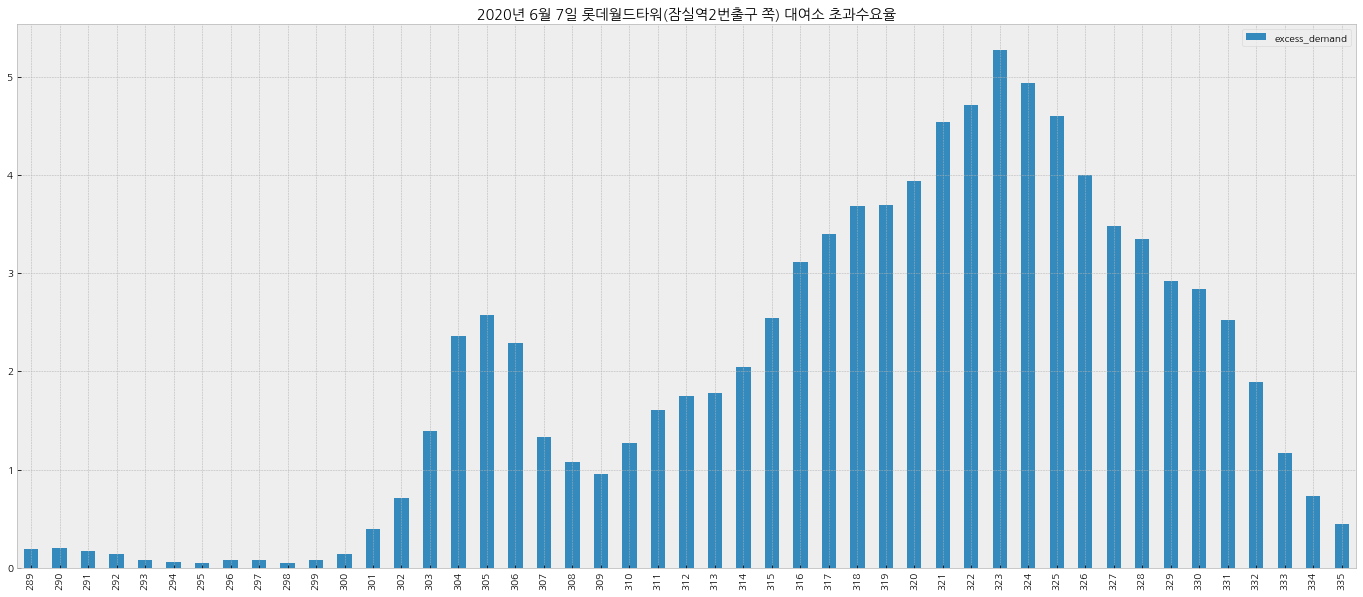

In [50]:
answer_7.plot(kind = 'bar', y = 'excess_demand', figsize = (24, 10), 
            title = '2020년 6월 7일 롯데월드타워(잠실역2번출구 쪽) 대여소 초과수요율')
plt.show()

- 20년 6월 7일 롯데월드타워 대여소를 살펴보면 21년 6월 7일 동일 대여소와 패턴은 유사하나 초과수요율이 더 낮음을 알 수 있음

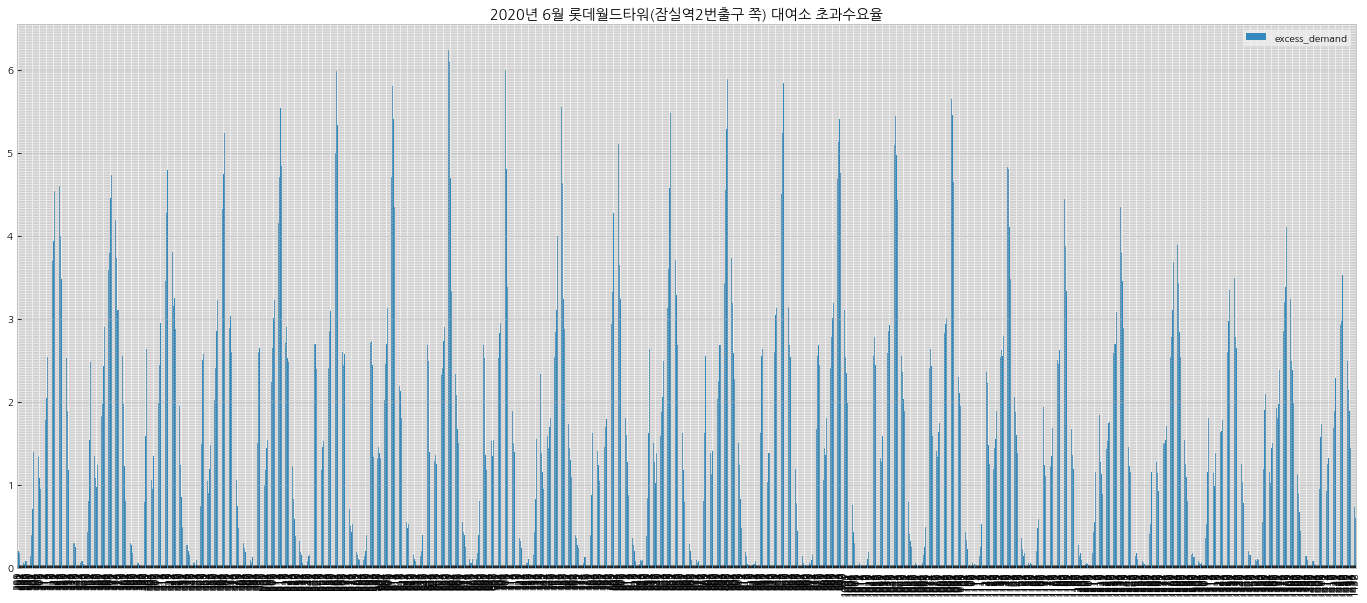

In [51]:
answer.plot(kind = 'bar', y = 'excess_demand', figsize = (24, 10), 
            title = '2020년 6월 롯데월드타워(잠실역2번출구 쪽) 대여소 초과수요율')
plt.show()

- 6월 전체 초과수요율 또한 21년에 비하면 낮음
- 그 이외의 패턴은 유사함